# RANDOM FOREST PERFORMANCE

The purpose of this script is to demonstrate the performance of Random Forest Regressor on the data.

We want to examine the histogram of errors on the test set and the train set.
We also want to see the importance of features.

This next cell loads the data, and fits the model.

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#should work the same for all persons.csv, by combining every
#person.csv file together. The only difference is that csv file is much larger
data = pd.read_csv('csv/person_12.csv',index_col=0)
resp = [i for i in data.columns if 'RESP' in i and i!=' RESP']
data.drop(resp+['Time [s]','sec'],axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = data.drop(' RESP',axis=1)
columns = X.columns
SS.fit(X,y=None)
y = data[' RESP'].values
X = SS.transform(X)

import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print('MSE: ',MSE)
print('MAE: ',MAE)
print('R2: ',R2)

MSE:  0.012094588019009842
MAE:  0.06413010326764088
R2:  0.8655802814702585


This cell makes plots of histograms of the errors on the test set and the train set.

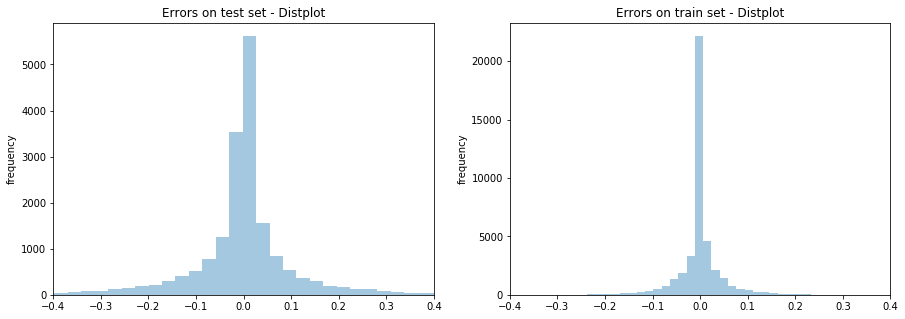

In [47]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats


errors_test = pd.DataFrame((y_pred - y_test)).dropna()
errors_train = pd.DataFrame((y_pred_train - y_train)).dropna()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Errors on test set - Distplot')
sns.distplot(errors_test,hist=True,kde=False)#, ax=second_ax1, kde=True, hist=True)
plt.xlabel('')
plt.ylabel('frequency')
plt.xlim(-0.4,0.4)

plt.subplot(1,2,2)
plt.title('Errors on train set - Distplot')
sns.distplot(errors_train,hist=True,kde=False)#, ax=second_ax2, kde=True)
plt.xlabel('')
plt.ylabel('frequency')
plt.xlim(-0.4,0.4)


plt.subplots_adjust(wspace=0.2)
plt.savefig('Errors_distplot.png')
plt.show()

We can see that the histograms of errors on both the train set and test set have very similar structure. The model is well fit. Note the scales are slightly different due to the size differences in the test set and the train set.

Feature ranking:
1.  V_Max (0.253485)
2.  PLETH (0.119379)
3.  AVR_Max (0.086255)
4.  II_Max (0.080188)
5.  V (0.064010)
6.  PLETH_Mean (0.053420)
7.  II (0.044312)
8.  V_Min (0.040665)
9.  PLETH_Max (0.032262)
10.  AVR (0.031937)
11.  V_Skw (0.023781)
12.  AVR_Min (0.019436)
13.  PLETH_Kurt (0.015522)
14.  II_Min (0.013928)
15.  PLETH_Min (0.013852)
16.  V_Mean (0.013105)
17.  II_Mean (0.011763)
18.  PLETH_Skw (0.011406)
19.  AVR_Kurt (0.011168)
20.  AVR_Mean (0.011078)
21.  V_Kurt (0.009221)
22.  II_Kurt (0.009001)
23.  AVR_Skw (0.008784)
24.  PULSE (0.006907)
25.  II_Skw (0.006352)
26.  HR (0.006162)
27.  SpO2 (0.002621)


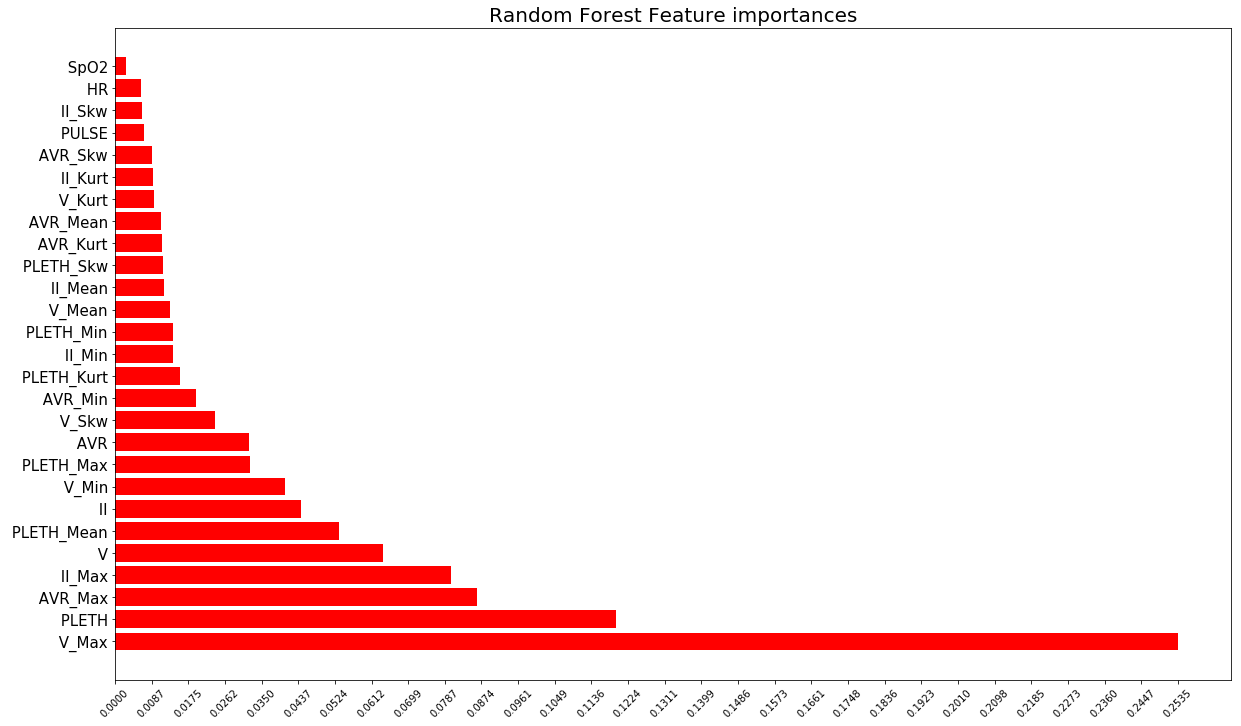

In [5]:
import matplotlib.pyplot as plt

rf = RandomForestRegressor()
X = pd.DataFrame(X,columns=columns)

rf.fit(X_train,y_train)

importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
feature_importances = []
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    feature_importances.append((X.columns[indices[f]],importances[indices[f]]))


# Print the feature ranking

values = [i[1] for i in feature_importances]
names = [i[0] for i in feature_importances]

# Plot the feature importances of the forest
plt.figure(figsize=(20,12))
plt.title("Random Forest Feature importances",fontsize=20)
plt.barh(range(len(names)),values,
       color="r", yerr=std[indices], align="center")
plt.yticks(range(len(names)),names,fontsize=15)
plt.xticks(np.linspace(0,max(importances),30),rotation=45)
#plt.savefig('RF_feature_importance.png')
plt.show()